<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Valérie Roy</span>
<span><img src="media/ensmp-25-alpha.png" /></span>
</div>

# figures et sous-figures

Où on étudie la façon de produire des figures (*fig*) qui contiennent plusieurs graphiques - pour cela ils incluent des sous-figures (*axis*)

Et oui les sous-figures s'appellent des *axis*...

Il est souvent intéressant de regrouper plusieurs courbes ensemble sur une même figure. Nous allons voir dans ce notebook comment créer une figure et y positionner des sous-figures sur une grille.

Importons les librairies.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## plusieurs courbes sur une même figure

Nous allons créer une figure en lui indiquant une taille puis y dessiner deux courbes. Il existe en `matplotlib` la notion de figure courante i.e. la figure sur laquelle les plots vont être dessinés.

Donc pour commencer rien ne nous empêche de dessiner deux courbes dans le même repère :

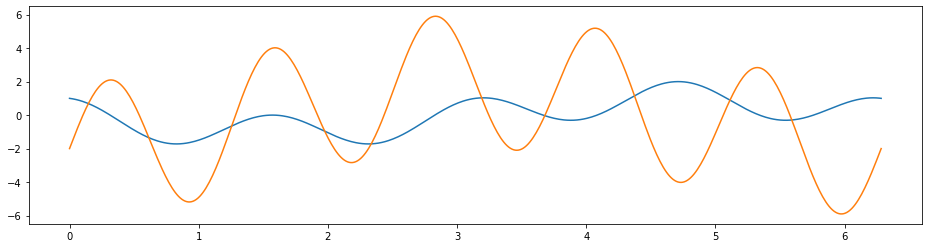

In [2]:
plt.figure(figsize=(16, 4))
x = np.linspace(0, 2*np.pi, 500)

y = np.cos(4*x)+ np.sin(-x)
plt.plot(x, y)

z = -2 * np.cos(x)+ 4*np.sin(5*x)
plt.plot(x, z);

En appelant la fonction `plt.show` je vais *fermer* une figure i.e. terminer la portée d'une figure, les futurs plots iront sur une autre figure.

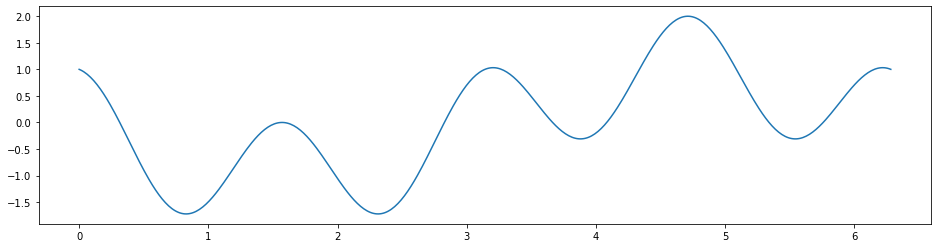

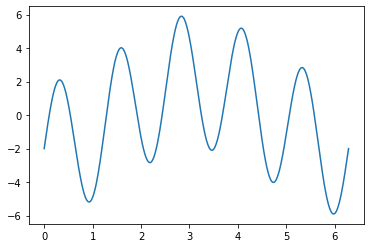

In [3]:
plt.figure(figsize=(16, 4))
x = np.linspace(0, 2*np.pi, 500)

y = np.cos(4*x)+ np.sin(-x)
plt.plot(x, y)

plt.show() # là je ferme la figure courante

z = -2 * np.cos(x)+ 4*np.sin(5*x)
plt.plot(x, z);

Notons que si vous utilisez `matplotlib` dans un script et non dans un notebook vous devrez appeler `plt.show()` pour que votre figure s'affiche.

## dessiner plusieurs sous-figures sur une figure

### avec un vecteur de sous-figures (`plt.subplots`)

Nous allons maintenant créer une figure, avec plusieurs courbes, mais **chacune avec son repère**;  
pour cela, on va positionner des **sous-figures** dans la figure.  
La notion de sous-figure correspond donc en gros à un repère, et c'est pour ça qu'elle s'appelle aussi `axis` dans le code - et d'ailleurs ça perturbe pas mal les débutants…

Pour pouvoir positionner les sous-figures/*axis*  dans la figure, on crée une grille virtuelle à l'intérieur de la figure, grâce à la fonction `plt.subplots()`, à laquelle on passe le nombre de lignes et de colonnes de la grille.

La fonction `fig.subplots` renvoie d'une part la figure, et un tableau `numpy` de sous-figures.

Ainsi si on demande une figure avec 2 lignes et 3 colonnes, on obtient un tableau (un `np.ndarray`) de forme (2, 3), chacun des éléments du tableau étant une sous-figure/*axis*

(2, 3)

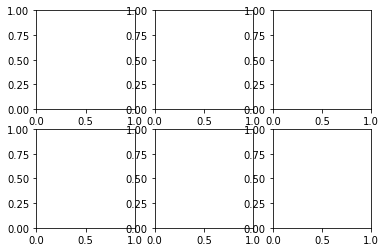

In [4]:
fig, axes = plt.subplots(2, 3)
axes.shape

La figure et ses sous-figures ont été dessinées vides. Maintenant on peut attacher des courbes aux axes (sous-figures). On crée l'abscisse x et les listes des valeurs des deux courbes $f(x)=\sin(x)$ et $f(x)=\cos(x)$ en *x*

In [5]:
# on va remplir la figure 
# avec des courbes un peu bateau
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
z = np.cos(x)

On met un sinus dans la sous-figure en haut et à gauche, donc d'indice (0, 0), et un cosinus dans la sous-figure en bas à droite (1, 2). On utilise les indices du `np.ndarray` de forme (2, 3):

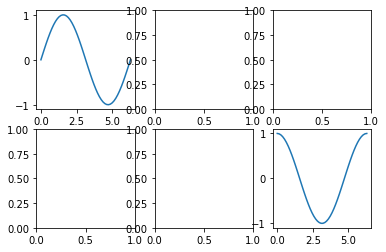

In [6]:
axes[0, 0].plot(x, y) 

# pour la dernière on
# aurait pu mettre aussi bien 
# axes[1, 2].plot(x, z)
axes[-1, -1].plot(x, z)

# on raffiche fig
fig

### avec des tailles/positions dans une grille (`plt.subplot`)

Les sous-figures vont pouvoir occuper plusieurs lignes et plusieurs colonnes.

Tout d'abord, on crée une figure sans lui indiquer la taille de sa grille de sous-figures.

In [7]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Ensuite, on va utiliser la fonction `fig.subplot` (attention il n'y a **pas de `s`** contrairement à la fonction de la section précédente) pour ajouter des sous-figures.

On indique 3 entiers *l*, *c* et *i* à la fonction `fig.subplot` soit en les séparant par des ',' soit en les donnant sous la forme d'un entier des 3 digit *lci*.

Si les trois les entiers sont *l*, *c* et *i* dans l'ordre, la sous-figure prendra la position *i* sur une grille avec *l* lignes et *c* colonnes. *i* commence à 1 en haut à gauche et s'augmente vers la droite.

Ainsi *fig.subplot(lci)* est la même chose que *fig.subplot(l, c, i)*.

Refaisons la même figure (2, 3) que précédemment:

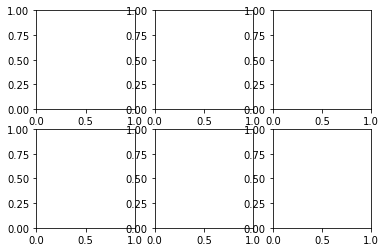

In [8]:
plt.figure()
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax3 = plt.subplot(234)
ax3 = plt.subplot(235)
ax3 = plt.subplot(236)
plt.show()

Maintenant on peut dessiner des courbes dans les sous-figures, on peut mettre un titre aux sous-figures avec `axi.set_title` (où `axi` est une sous-figure), on peut mettre un titre à la figure globale avec `plt.suptitle`..

Remarquez que cette façon de faire est un peu plus flexible que la précédente, puisqu'avec `subplots` on est découpe forcément en une grille régulière, alors qu'ici en jonglant un petit peu, on peut faire des choses un peu plus irrégulières, comme par exemple :

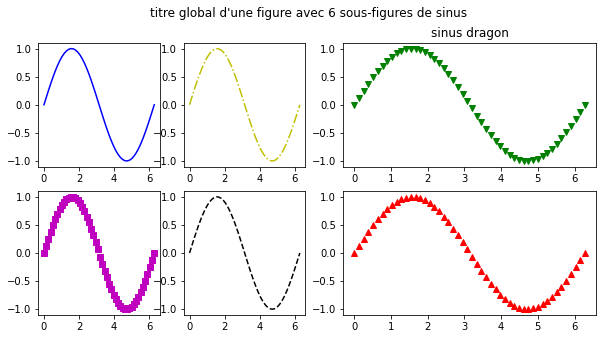

In [9]:
# efforcez-vous de vbien comprendre 
# les paramètres que je passe aux 
# 6 appels à subplot
plt.figure(figsize=(10, 5))

plt.suptitle("titre global d'une figure avec 6 sous-figures de sinus")

ax1 = plt.subplot(2, 4, 1)
ax1.plot(x, y, 'b-')
ax2 = plt.subplot(2, 4, 2)
ax2.plot(x, y, 'y-.')

ax3 = plt.subplot(2, 2, 2)
ax3.plot(x, y, 'gv')
ax3.set_title("sinus dragon")

ax4 = plt.subplot(2, 4, 5)  
ax5 = plt.subplot(2, 4, 6) 
ax6 = plt.subplot(2, 2, 4)

ax4.plot(x, y, 'ms')
ax6.plot(x, y, 'r^')
ax5.plot(x, y, 'k--')

plt.show()

Notons que cette seconde manière de faire rend le code brouillon, peu lisible, et source d'erreurs (par exemple, il faut se souvenir des noms de variables qu'on a choisis pour désigner les sous-figures, surtout si/quand on voudra modifier les dessins à postériori).

Du coup si vous avez besoin d'une grille régulière, il est sans doute préférable d'utiliser la fonction `plt.subplots` qui renvoie la figure globale et un tableau des sous-figures.

Bien sûr on peut améliorer les sous-figures: nommer abscisses et ordonnées, ajouter des légendes... et des tas d'autres fonctionnalités (dont certaines très avancées), il faut se référer à la documentation  https://matplotlib.org/api/axes_api.html et aux exemples sur Internet.